In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

In [2]:
def derivative_model_1(x, t, beta, a, mu, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]
    
    S_prime = mu*N - beta*a*S*I/N + w*R - mu*S
    I_prime = (beta*a*S/N - gamma - mu)*I
    R_prime = gamma*I - (mu + w)*R
    
    return [S_prime, I_prime, R_prime]


def model_1(beta, a, mu, w, one_over_gamma, initial_I, initial_R, N, max_time):
    
    ts = np.linspace(0, max_time, 1000)
    xs = odeint(derivative_model_1, 
                [N-initial_I-initial_R, initial_I, initial_R],
                ts,
                args=(beta, a, mu, w, 1/one_over_gamma, N))    
    
    plt.plot(ts, xs)
    plt.show()
    
    R0 = beta*a/(1/one_over_gamma+mu)
    print(R0)

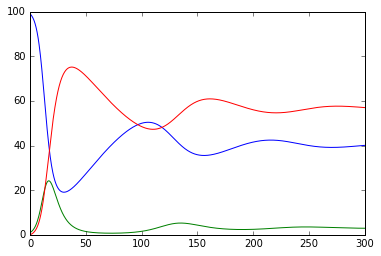

2.487562189054726


In [3]:
model_1(0.05, 10, 0.001, 0.01, 5, 1, 0, 100, 300)

In [4]:
legends = ["S: susceptible", "I: infectious", "R: recovered"]
xlabel = "Time (days)"
resolution = 1000


def plot_model(ts, xs):
    plt.plot(ts, xs)
    plt.legend(legends)
    plt.xlabel(xlabel)
    plt.show()

    
def model_1(beta=0.05,
            a=10.0, 
            mu=0.001, 
            w=0.01, 
            one_over_gamma=5.0, 
            initial_I=1, 
            initial_R=0,
            N=100,
            max_time=300.0):
    
    ts = np.linspace(0, max_time, resolution)
    xs = odeint(derivative_model_1, 
                [N-initial_I-initial_R, initial_I, initial_R],
                ts,
                args=(beta, a, mu, w, 1/one_over_gamma, N))    
    plot_model(ts, xs)
    R0 = beta*a/(1/one_over_gamma+mu)
    print("R0 = {:.2f}".format(R0))

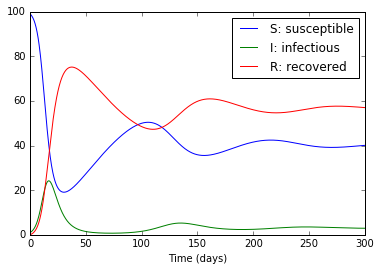

R0 = 2.49


In [5]:
model_1()

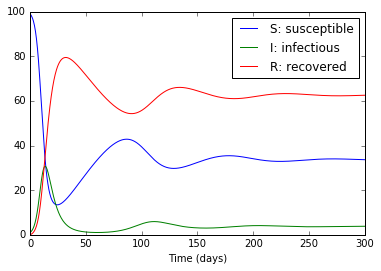

R0 = 2.97


In [6]:
model_1(mu=0.002, beta=0.06)

In [7]:
interact(model_1,
         beta=(0.01, 0.1, 0.01), 
         a=(5, 15, 0.1), 
         mu=(0, 0.01, 0.0001), 
         w=(0.001, 0.1, 0.001), 
         one_over_gamma=(2, 10, 0.1), 
         N=(0, 1000, 10.0),
         initial_I=(0, 50),
         initial_R=(0, 50),
         max_time=(1, 500, 10))

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, min=0.01, step=0.01), FloatSlider(value=10.0, description='a', max=15.0, min=5.0), FloatSlider(value=0.001, description='mu', max=0.01, step=0.0001), FloatSlider(value=0.01, description='w', max=0.1, min=0.001, step=0.001), FloatSlider(value=5.0, description='one_over_gamma', max=10.0, min=2.0), IntSlider(value=1, description='initial_I', max=50), IntSlider(value=0, description='initial_R', max=50), FloatSlider(value=100.0, description='N', max=1000.0, step=10.0), IntSlider(value=300, description='max_time', max=500, min=1, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.model_1>

In [8]:
default_sliders = {'beta':(0.01, 0.1, 0.01), 
                   'a':(5, 15, 0.1), 
                   'mu':(0.0, 0.01, 0.0001), 
                   'w':(0.001, 0.1, 0.001), 
                   'one_over_gamma':(2.0, 10.0, 0.1), 
                   'N':(1, 1000, 10),
                   'initial_I':(0, 50),
                   'initial_R':(0, 50),
                   'max_time':(1, 500, 10),
                   'continuous_time':False}


interact(model_1, **default_sliders)

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, min=0.01, step=0.01), FloatSlider(value=10.0, description='a', max=15.0, min=5.0), FloatSlider(value=0.001, description='mu', max=0.01, step=0.0001), FloatSlider(value=0.01, description='w', max=0.1, min=0.001, step=0.001), FloatSlider(value=5.0, description='one_over_gamma', max=10.0, min=2.0), IntSlider(value=1, description='initial_I', max=50), IntSlider(value=0, description='initial_R', max=50), IntSlider(value=100, description='N', max=1000, min=1, step=10), IntSlider(value=300, description='max_time', max=500, min=1, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.model_1>

In [9]:
import ipywidgets

default_sliders['one_over_gamma'] = ipywidgets.FloatSlider(
    value=5.0,
    min=2.0,
    max=10.0,
    step=0.1,
    description='1/gamma')

interact(model_1, **default_sliders)

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, min=0.01, step=0.01), FloatSlider(value=10.0, description='a', max=15.0, min=5.0), FloatSlider(value=0.001, description='mu', max=0.01, step=0.0001), FloatSlider(value=0.01, description='w', max=0.1, min=0.001, step=0.001), FloatSlider(value=5.0, description='1/gamma', max=10.0, min=2.0), IntSlider(value=1, description='initial_I', max=50), IntSlider(value=0, description='initial_R', max=50), IntSlider(value=100, description='N', max=1000, min=1, step=10), IntSlider(value=300, description='max_time', max=500, min=1, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.model_1>

In [10]:
def derivative_model_2(x, t, beta, a, p, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]
    
    new_infections = beta*a*S*I/N
    S_prime = - new_infections + w*R
    I_prime = new_infections - gamma*I
    R_prime = gamma*I - w*R
    
    return [S_prime, I_prime, R_prime]

def model_2(beta=0.05,
            a=10,  
            w=0.01, 
            one_over_gamma=5.0,
            p=0.2,
            initial_I=1.0,
            N=100.0,            
            max_time=300.0):
            
    ts = np.linspace(0, max_time, resolution)
    xs = odeint(derivative_model_2,
                [N-initial_I-p*N, initial_I, p*N],
                ts,
                args=(beta, a, p, w, 1/one_over_gamma, N))
    
    plot_model(ts, xs)
    
    R0 = beta*a*one_over_gamma
    Rv = (1-p)*R0
    print("R0 = {:.2f}".format(R0))
    print("Rv = {:.2f}".format(Rv))

In [11]:
default_sliders['p'] = (0, 1, 0.1)

interact(model_2, **default_sliders)

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, min=0.01, step=0.01), FloatSlider(value=10.0, description='a', max=15.0, min=5.0), FloatSlider(value=0.01, description='w', max=0.1, min=0.001, step=0.001), FloatSlider(value=5.0, description='1/gamma', max=10.0, min=2.0), FloatSlider(value=0.2, description='p', max=1.0), IntSlider(value=1, description='initial_I', max=50), IntSlider(value=100, description='N', max=1000, min=1, step=10), IntSlider(value=300, description='max_time', max=500, min=1, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.model_2>

In [12]:
def derivative_model_3(x, t, beta, a, p, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]
    
    new_infections = beta*a*S*I/N
    S_prime = -new_infections + w*R
    I_prime = new_infections - gamma*I
    R_prime = gamma*I - w*R
    C_prime = new_infections
    
    return [S_prime, I_prime, R_prime, C_prime]


def model_3(beta=0.05,
            a=10,  
            w=0.01, 
            one_over_gamma=5.0,
            p=0.2,
            initial_I=1,
            N=100,
            max_time=300):
            
    ts = np.linspace(0, max_time, resolution)
    xs = odeint(derivative_model_3,
                [N-initial_I-p*N, initial_I, p*N, 0],
                ts,
                args=(beta, a, p, w, 1/one_over_gamma, N))
    
    plot_model(ts, xs)
    
    R0 = beta*a*one_over_gamma
    Rv = (1-p)*R0
    print("R0 = {:.2f}".format(R0))
    print("Rv = {:.2f}".format(Rv))

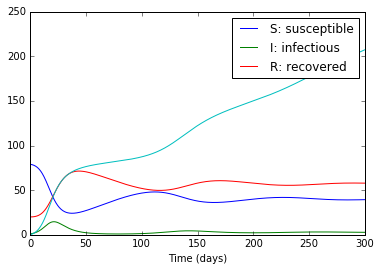

R0 = 2.50
Rv = 2.00


In [13]:
model_3()

In [14]:
legends = ['S: susceptible',
           'I: infectious',
           'R: recovered',
           'C: cumulative']

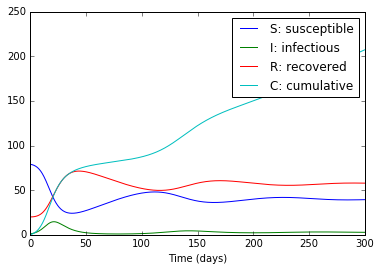

R0 = 2.50
Rv = 2.00


In [15]:
model_3()

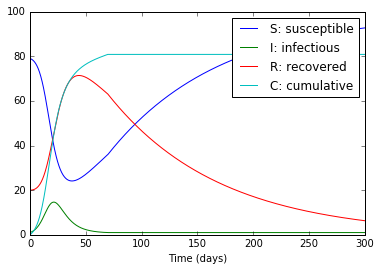

R0 = 2.50
Rv = 2.00


In [16]:
def derivative_model_3(x, t, beta, a, p, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]
    c = x[3]
    
    new_infections = beta*a*S*I/N
    if I < 1:
        I = 0
        new_infections = 0
    
    S_prime = -new_infections + w*R
    I_prime = new_infections - gamma*I
    R_prime = gamma*I - w*R
    C_prime = new_infections
    
    return [S_prime, I_prime, R_prime, C_prime]

    
model_3()

In [17]:
interact(model_3, **default_sliders)

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, min=0.01, step=0.01), FloatSlider(value=10.0, description='a', max=15.0, min=5.0), FloatSlider(value=0.01, description='w', max=0.1, min=0.001, step=0.001), FloatSlider(value=5.0, description='1/gamma', max=10.0, min=2.0), FloatSlider(value=0.2, description='p', max=1.0), IntSlider(value=1, description='initial_I', max=50), IntSlider(value=100, description='N', max=1000, min=1, step=10), IntSlider(value=300, description='max_time', max=500, min=1, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.model_3>